EDA and D3 visualizations are two important concepts in data analysis and visualization:
1. EDA: Is an approach to analyzing datasets to summarize their main characteristics, often using visual methods. It's a critical step in data analysis that helps analysts understand the data before making assumptions or fitting models. Key aspects of EDA include:
 . Summarizing the main characteristics of a dataset
 . Understanding variable distributions
 . Identifying patterns, trends, and anomalies
 . Detecting outliers and missing data
 . Formulating hypotheses for further investigation

EDA often uses various statistical and graphical techniques such as histograms, box plots, scatter plots, and correlation matrices.

2. D3 Visualizations: D3 stands for Data-Driven Documents. It's a powerful JavaScript library used for creating dynamic, interactive data visualizations in web browsers. Key features of D3:
 . Allows for binding arbitrary data to a Document Object Model (DOM)
 . Uses HTML, SVG, and CSS to create visualizations
 . Provides powerful visualization components and a data-driven approach to DOM manipulation
 . Enables creation of highly customizable charts, graphs, and interactive visualizations
 . Supports large datasets and dynamic behaviors for interaction and animation

D3 is widely used for creating complex, interactive data visualizations such as:
Interactive charts and graphs, Geographical maps, Network diagrams, Hierarchical tree structures, Custom visual representations of data


Let's break this down into steps:


## Step 1: Choosing a Complex Dataset

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d retailrocket/ecommerce-dataset

Dataset URL: https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset
License(s): CC-BY-NC-SA-4.0
100% 291M/291M [00:17<00:00, 21.5MB/s]
100% 291M/291M [00:17<00:00, 17.2MB/s]


In [4]:
!unzip ecommerce-dataset.zip

Archive:  ecommerce-dataset.zip
  inflating: category_tree.csv       
  inflating: events.csv              
  inflating: item_properties_part1.csv  
  inflating: item_properties_part2.csv  


In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For HTML and D3.js integration
from IPython.display import HTML, display

# Load events data
events = pd.read_csv('events.csv')

# Load item properties data
item_properties1 = pd.read_csv('item_properties_part1.csv')
item_properties2 = pd.read_csv('item_properties_part2.csv')

item_properties = pd.concat([item_properties1, item_properties2]) # Now item_properties contains both parts

# Load category tree data
category_tree = pd.read_csv('category_tree.csv')

# Optional: Preview loaded data
print(events.head())
print(item_properties.head())
print(category_tree.head())



       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0



## Step 2: Initial Data Exploration

Data Overview: Run the following commands to understand the dataset:

In [9]:
data = events
# Check the shape of the data
data.shape

# Summary of the dataset
data.info()

# Check for missing values
data.isnull().sum()

# Statistical summary
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


Event Types and Time-based Features: Since this dataset likely contains time-based data (timestamps) and event types (like clicks, views, purchases), let’s extract time-based features and look at event distributions:

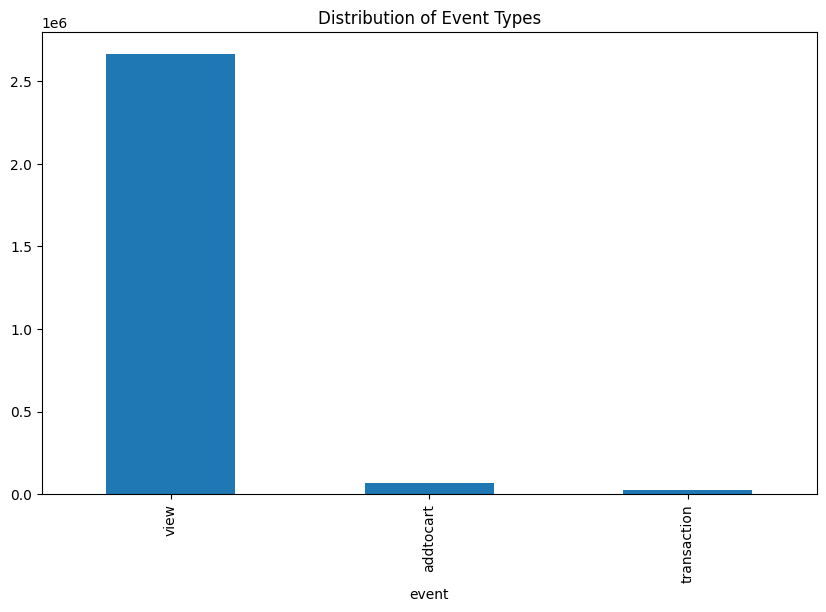

In [11]:
# Convert timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')

# Extract hour, day, and month for analysis
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Event type distribution
data['event'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Event Types')
plt.show()


## Step 3: Basic EDA and Visualizations

Before moving to advanced D3.js visualizations, let’s do some traditional EDA.

Product Popularity by Event Type: Let’s visualize how many views, clicks, and purchases each product receives.

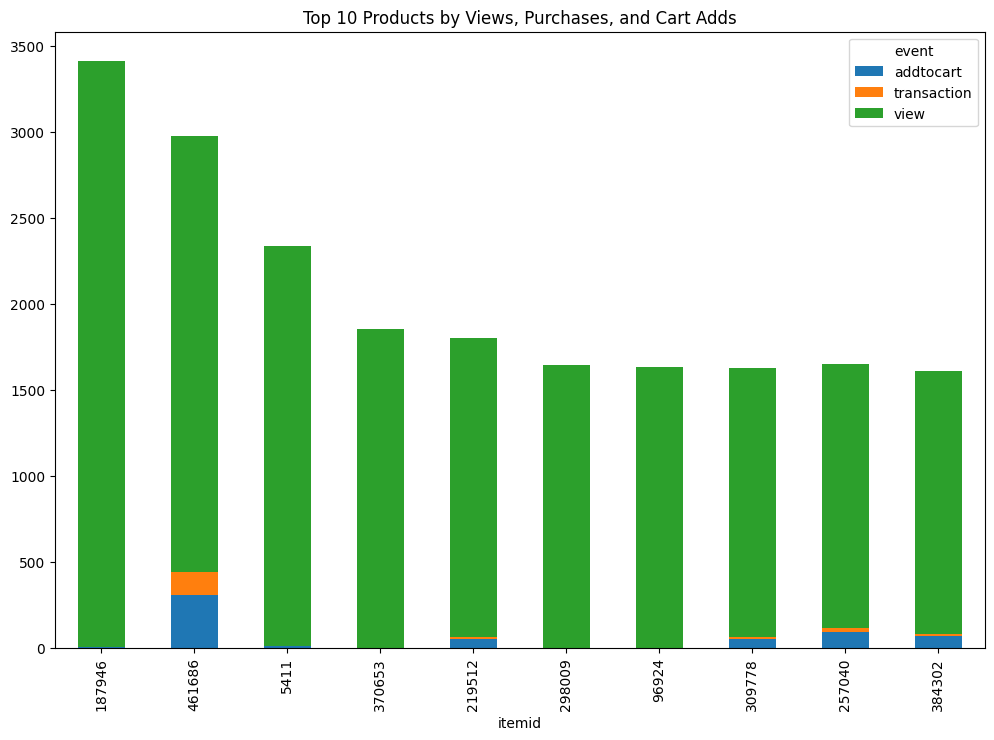

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by product and event type
product_event_counts = data.groupby(['itemid', 'event']).size().unstack(fill_value=0)

# Visualize the top products by event type
top_products = product_event_counts.nlargest(10, 'view')
top_products.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Top 10 Products by Views, Purchases, and Cart Adds')
plt.show()


## Step 4: Advanced D3.js Visualizations

Here’s where we step up the game with interactive D3.js visualizations. Let’s start by embedding a simple D3.js bar chart to represent product views. In Colab, we’ll use the HTML class to inject the D3.js code.

### D3.js Bar Chart for Product Views

In [23]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>D3.js Bar Chart</title>
    <script src="https://d3js.org/d3.v5.min.js"></script>
</head>
<body>
    <div id="chart"></div>
    <script>
        var data = [30, 86, 168, 281, 303, 365];
        var width = 500;
        var barHeight = 20;

        var chart = d3.select("#chart")
            .append("svg")
            .attr("width", width)
            .attr("height", barHeight * data.length);

        var bar = chart.selectAll("g")
            .data(data)
            .enter().append("g")
            .attr("transform", function(d, i) { return "translate(0," + i * barHeight + ")"; });

        bar.append("rect")
            .attr("width", function(d) { return d; })
            .attr("height", barHeight - 1);

        bar.append("text")
            .attr("x", function(d) { return d - 3; })
            .attr("y", barHeight / 2)
            .attr("dy", ".35em")
            .text(function(d) { return d; });
    </script>
</body>
</html>


### Sunburst Chart for Hierarchical Product Categories
A sunburst chart represents hierarchical data, which makes it perfect for the Retailrocket dataset, where we can organize products into categories and subcategories.

In [24]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>D3.js Sunburst Chart</title>
    <script src="https://d3js.org/d3.v5.min.js"></script>
    <script src="https://d3js.org/d3-hierarchy.v1.min.js"></script>
</head>
<body>
    <div id="chart"></div>
    <script>
        var data = {
          "name": "Products",
          "children": [
            {"name": "Category 1", "children": [
              {"name": "Product 1.1", "size": 30},
              {"name": "Product 1.2", "size": 86}
            ]},
            {"name": "Category 2", "children": [
              {"name": "Product 2.1", "size": 168},
              {"name": "Product 2.2", "size": 281}
            ]},
            {"name": "Category 3", "children": [
              {"name": "Product 3.1", "size": 303},
              {"name": "Product 3.2", "size": 365}
            ]}
          ]
        };

        var width = 500,
            radius = width / 6;

        var partition = d3.partition()
            .size([2 * Math.PI, radius]);

        var arc = d3.arc()
            .startAngle(function(d) { return d.x0; })
            .endAngle(function(d) { return d.x1; })
            .innerRadius(function(d) { return d.y0; })
            .outerRadius(function(d) { return d.y1; });

        var root = d3.hierarchy(data)
            .sum(function(d) { return d.size; });

        partition(root);

        var svg = d3.select("#chart").append("svg")
            .attr("width", width)
            .attr("height", width)
            .append("g")
            .attr("transform", "translate(" + width / 2 + "," + width / 2 + ")");

        svg.selectAll("path")
            .data(root.descendants())
            .enter().append("path")
            .attr("d", arc)
            .style("fill", function(d) { return d3.interpolateRainbow(d.depth / 5); })
            .append("title")
            .text(function(d) { return d.data.name + "\\n" + d.value; });
    </script>
</body>
</html>


Data Structure: The data object holds a hierarchy of products and their categories. This is where you can input your actual data from the Retailrocket dataset.

Visualization: We create a partition layout in D3.js to represent the hierarchy in a circular sunburst form, with each arc representing a category or product.

### Hierarchical Tree Map
A tree map is another way to represent hierarchical data, but in a rectangle format. It’s great for visualizing proportions between different product categories and types.

In [15]:
tree_map_html = """
<div id="tree_map"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script src="https://d3js.org/d3-hierarchy.v1.min.js"></script>
<script>
  var data = {
    "name": "Products",
    "children": [
      {"name": "Category 1", "children": [
        {"name": "Product 1.1", "size": 30},
        {"name": "Product 1.2", "size": 86}
      ]},
      {"name": "Category 2", "children": [
        {"name": "Product 2.1", "size": 168},
        {"name": "Product 2.2", "size": 281}
      ]},
      {"name": "Category 3", "children": [
        {"name": "Product 3.1", "size": 303},
        {"name": "Product 3.2", "size": 365}
      ]}
    ]
  };

  var width = 500,
      height = 300;

  var svg = d3.select("#tree_map").append("svg")
      .attr("width", width)
      .attr("height", height);

  var root = d3.hierarchy(data)
      .sum(function(d) { return d.size; });

  d3.treemap()
      .size([width, height])
      .padding(1)
      (root);

  var cell = svg.selectAll("g")
      .data(root.leaves())
      .enter().append("g")
      .attr("transform", function(d) { return "translate(" + d.x0 + "," + d.y0 + ")"; });

  cell.append("rect")
      .attr("width", function(d) { return d.x1 - d.x0; })
      .attr("height", function(d) { return d.y1 - d.y0; })
      .style("fill", function(d) { return d3.interpolateViridis(d.value / 365); });

  cell.append("text")
      .attr("x", 5)
      .attr("y", 15)
      .text(function(d) { return d.data.name; });
</script>
"""

display(HTML(tree_map_html))


Tree Map Layout: This uses the d3.treemap() function to create a layout based on the size of each product/category.

Colors and Text: The tree map is color-coded to show relative sizes, and labels are added to each rectangle.

### Interactive Time-Series Line Chart
This visualization helps track trends over time, such as user activity (views, purchases) by hour, day, or month.

In [25]:
time_series_html = """
<div id="time_chart"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>
  var data = [
    {"date": "2024-01-01", "views": 100, "purchases": 30},
    {"date": "2024-01-02", "views": 200, "purchases": 50},
    {"date": "2024-01-03", "views": 300, "purchases": 80},
    {"date": "2024-01-04", "views": 400, "purchases": 100}
  ];

  var parseDate = d3.timeParse("%Y-%m-%d");

  data.forEach(function(d) {
    d.date = parseDate(d.date);
  });

  var width = 500, height = 300;

  var svg = d3.select("#time_chart").append("svg")
      .attr("width", width)
      .attr("height", height);

  var x = d3.scaleTime().range([0, width]),
      y = d3.scaleLinear().range([height, 0]);

  var line = d3.line()
      .x(function(d) { return x(d.date); })
      .y(function(d) { return y(d.views); });

  var line2 = d3.line()
      .x(function(d) { return x(d.date); })
      .y(function(d) { return y(d.purchases); });

  x.domain(d3.extent(data, function(d) { return d.date; }));
  y.domain([0, d3.max(data, function(d) { return d.views; })]);

  svg.append("path")
      .data([data])
      .attr("class", "line")
      .attr("d", line)
      .style("stroke", "steelblue");

  svg.append("path")
      .data([data])
      .attr("class", "line")
      .attr("d", line2)
      .style("stroke", "green");

  svg.append("g")
      .attr("transform", "translate(0," + height + ")")
      .call(d3.axisBottom(x));

  svg.append("g")
      .call(d3.axisLeft(y));
</script>
"""

display(HTML(time_series_html))


Time-Series Data: This line chart compares views and purchases over time.

Interactive Scaling: You can add zoom and pan functionality with D3.js to allow users to focus on specific time ranges.

## Step 5: Interactive Visualization with Filters

It allows users to dynamically manipulate the data they see on a chart. Filters enable users to focus on specific aspects of the data by changing parameters such as event types, product categories, time ranges, or other attributes.

Key Components of Filterable Visualization:
1. Dropdown Menu for Filters: This enables users to select different filters (like event type).

2. Dynamic Data Update: The chart updates based on the selected filter, redrawing itself with the filtered data.

3. Transitions: To make the update smooth, D3.js transitions will make the data change more visually appealing.

## Interactive Bar Chart with Event Type Filter

### Step 1: Prepare HTML Structure for the Filter and Chart
We create a dropdown menu that filters product events and a bar chart that updates accordingly.

In [26]:
from IPython.core.display import display, HTML

interactive_chart_html = """
<div>
  <label for="eventType">Filter by Event Type: </label>
  <select id="eventType" onchange="updateChart(this.value)">
    <option value="view">View</option>
    <option value="purchase">Purchase</option>
    <option value="cart">Cart</option>
  </select>
</div>
<div id="chart"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>
  // Data for three different event types
  var data = {
    "view": [30, 86, 168, 281, 303, 365],
    "purchase": [15, 40, 80, 120, 160, 200],
    "cart": [5, 30, 55, 100, 130, 170]
  };

  // Set dimensions of the chart
  var width = 500,
      height = 300,
      barHeight = 20;

  // Create an SVG element for the chart
  var svg = d3.select("#chart").append("svg")
      .attr("width", width)
      .attr("height", height);

  // Function to update the chart based on the selected event type
  function updateChart(eventType) {
    var selectedData = data[eventType];

    // Remove existing bars if any
    svg.selectAll("*").remove();

    // Update the chart with the new data
    var bars = svg.selectAll("rect")
      .data(selectedData)
      .enter().append("rect")
      .attr("x", 0)
      .attr("y", function(d, i) { return i * barHeight; })
      .attr("width", 0)  // Start the width at 0 for transition effect
      .attr("height", barHeight - 1)
      .transition()
      .duration(750)
      .attr("width", function(d) { return d; });

    // Add text labels for each bar
    svg.selectAll("text")
      .data(selectedData)
      .enter().append("text")
      .attr("x", function(d) { return d - 3; })
      .attr("y", function(d, i) { return i * barHeight + barHeight / 2; })
      .attr("dy", ".35em")
      .text(function(d) { return d; });
  }

  // Initialize the chart with 'view' data
  updateChart('view');
</script>
"""

display(HTML(interactive_chart_html))


### Step 2 : Customization for Your Dataset
For Retailrocket Dataset, you can modify the data arrays to reflect the actual counts of events (views, purchases, carts) for different products. You can also update the eventType options to reflect different filters, such as categories, time intervals, or specific user behaviors.

In [30]:
# Group data by event type to count occurrences of each event
event_type_data = data.groupby('event')['itemid'].count()

# Convert to dictionary format for use in D3.js
event_type_dict = event_type_data.to_dict()

# Print or save the dictionary for embedding in your D3.js code
print(event_type_dict)


{'addtocart': 69332, 'transaction': 22457, 'view': 2664312}


## Step 6: Conclusion
Once all visualizations are complete, you can summarize your findings by focusing on:

Customer behavior (e.g., when most purchases happen, popular products).
Recommendations based on trends observed from visualizations.